In [1]:
import pandas as pd
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
Rohdaten = pd.read_csv('D:\Daten\DISS\Daten\Estrategias_Estudiantes_Kienberger.csv')

In [3]:
Rohdaten.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,D-Q8b22b_12,D-Q8b22c,D-Q9_1,D-Q9_2,E-T1,E-Q1,LocationLatitude,LocationLongitude,LocationAccuracy,Unnamed: 442
0,ResponseID,ResponseSet,Name,ExternalDataReference,EmailAddress,IPAddress,Status,StartDate,EndDate,Finished,...,¿Qué nivel ha alcanzado?-C2,Comentarios (opcional):,¿Dónde ha rellenado esta encuesta?-En clase,¿Dónde ha rellenado esta encuesta?-Fuera de clase,Comentarios adicionales,"Si lo desea, puede escribir un comentario y da...",LocationLatitude,LocationLongitude,LocationAccuracy,NaN
1,R_1kOiXpqqaX3Irxm,Default Response Set,Anonymous,NaN,NaN,88.3.172.215,0,2017-11-09 13:10:29,2017-11-09 13:25:39,1,...,NaN,NaN,NaN,1,1,Gratificante y útil,40.968795776367,-5.6638946533203,-1,NaN
2,R_1F5FzvY7aYwiipy,Default Response Set,Anonymous,NaN,NaN,212.128.135.110,0,2017-11-10 01:39:27,2017-11-10 01:54:25,1,...,NaN,NaN,NaN,1,1,Una encuesta muy completa que me ha servido pa...,40.96809387207,-5.6620025634766,-1,NaN
3,R_2ErWjTyNYcSh10N,Default Response Set,Anonymous,NaN,NaN,212.128.135.84,0,2017-11-10 02:23:28,2017-11-10 02:39:04,1,...,NaN,NaN,NaN,1,1,NaN,40.96809387207,-5.6620025634766,-1,NaN
4,R_1Cqe3iaPqIH7rmA,Default Response Set,Anonymous,NaN,NaN,85.53.244.6,0,2017-11-10 08:03:08,2017-11-10 08:21:35,1,...,NaN,NaN,NaN,1,1,NaN,40.417205810547,-3.6840057373047,-1,NaN


### Glossar erstellen

In [4]:
gloss = pd.DataFrame(Rohdaten.loc[0])

Zeilen entfernen, z.B. 1. Zeile, die Bezeichnungen enthält (ins Glossar aufgenommen)

In [5]:
Rohdaten = Rohdaten.drop(0).reset_index(drop=True)

### Gültige Daten auswählen

In [6]:
for i, val in enumerate(gloss[0]):
    if 'inish' in str(val):
        print(gloss.iloc[i],i,val)

0    Finished
Name: V10, dtype: object 9 Finished


Erklärungen dazu:

* for = Programm durchläuft Tabelle Zeile für Zeile, nach Zeilennummer/Position (=i, 1. Zeile in Python hat Wert 0) + angegebenem Wert (=val)
* enumerate = Funktion in Python, die Position + Werte angibt
* str = Funktion in Python, die Reihenfolge von Zeichen als Zeichen ("Text") ausgibt (und nicht als Zahlen)
* .loc['...'] = localizar/suchen mit Namen der Zeile + Name der Spalte
* .iloc[...] = localizar/suchen mit Nummer der Zeile + Name der Spalte

In [7]:
def get_name_gloss(word):
    for i, val in enumerate(gloss[0]):
        if word.lower() in str(val).lower():
            return i, gloss.index[i]

Erkärungen zum Funktion erstellen:

def = Bezeichnung für Funktion festlegen; word = Variable in dieser Funktion (frei wählbar), gilt nur, wenn diese Funktion aufgerufen wird

(word.lower = Klein/Großschreibung nicht beachtet)

* return = angeben, kann verwendet werden
* print = anzeigen

In [8]:
get_name_gloss('mAil')

(4, 'V5')

fertig ausgefüllte Fragebögen -> von Qualtrics als "finished" definiert (= in Spalte "finished" Wert "1")

In [9]:
Finished = Rohdaten[Rohdaten['V10'] == '1'].reset_index(drop=True)

### Duplikate entfernen

In [10]:
ind_dup = []
for j, wert in enumerate(Finished['A-Q1']):
    if 'rellenad' in str(wert):
        ind_dup.append(j)

In [11]:
ind_dup

[55, 56, 58, 59]

In [12]:
Datenber = Finished.drop(ind_dup).reset_index(drop=True)

Funktion zum Zählen der fehlenden Werte ("nan"), enthält Tricks aufgrund Problems nummerischer-kategorischer Werte (später eventuell nicht mehr notwendig, soll im Weiteren verändert werden...)

In [13]:
def count_nan(row):
    cnt = 0
    for el in row:
        if str(el) == 'nan':
            cnt = cnt + 1
    return cnt*100/len(row)

letzte Zeile in Funktion bewirkt, dass nicht Anzahl an "nan", sondern Prozentsatz gezählt wird

In [14]:
count_nan(Datenber.loc[43])

72.46049661399549

In [15]:
porc_nan = []
for i in range(Datenber.shape[0]):
    porc_nan.append(count_nan(Datenber.loc[i]))

range = Vektor, der alle Zeilen/Zahlen zwischen zwei Zahlenangaben enthält (z.B. von Zeile 0 bis Zeile 68 in unserer Tabelle, das könnte man auch als "range(69)" angeben)

shape = zeigt Umfang einer Tabelle an, 0 = Zeilen, 1 = Spalten

In [16]:
Datenber['porc_nan'] = porc_nan

eine neue Spalte hinzufügen und benennen (hinzugefügte Liste hat zufällig gleichen Namen, könnte nach = auch anders heißen)

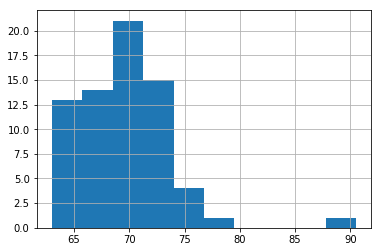

In [17]:
Datenber['porc_nan'].hist()

.hist = histogram (Grafik)

In [18]:
Datenber[Datenber['porc_nan'] > 85].index

Int64Index([56], dtype='int64')

In [19]:
Datenber = Datenber.drop(Datenber[Datenber['porc_nan'] > 85].index).reset_index(drop=True)

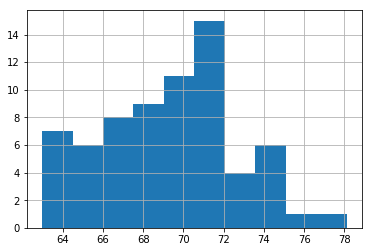

In [20]:
Datenber['porc_nan'].hist()

### Art der Werte kontrollieren und anpassen

Um Datentypen anzuzeigen:

In [21]:
Datenber.dtypes

V1                    object
V2                    object
V3                    object
V4                    object
V5                    object
V6                    object
V7                    object
V8                    object
V9                    object
V10                   object
T1                    object
T2                    object
T3                    object
A-T1                  object
A-T2                  object
A-G1                  object
A-T3                  object
A-Q1                  object
A-T4                  object
A-T1.1                object
A_Q2_1                object
A_Q2_2                object
A_Q2_3                object
A_Q2_4                object
A_Q2_5                object
A_Q2_6                object
A_Q2_7                object
A-T1.2                object
A_Q3_1                object
A_Q3_2                object
                      ...   
D-Q8b21a_7            object
D-Q8b21a_7_TEXT       object
D-Q8b21a_8            object
D-Q8b21b      

Auswahl der Spalten ohne Texteingabe:
* wenn Wort "comentario" in der Beschreibung der Fragen vorkommt (Bezug auf Glossar!)
* wenn Wort "text" in der Bezeichnung der Fragen=Spalten vorkommt (Bezug auf zuvor erstellte Liste)

In [22]:
gloss.loc['B-Q1_19'][0]

'En la parte anterior de la encuesta ha indicado las estrategias que utiliza para descubrir el sig...-- Por mi cuenta, sin ayuda de otras personas'

In [23]:
liste_ohne_komm = [ind for ind in gloss.index if 'comentario' not in str(gloss.loc[ind][0]).lower()]

In [24]:
liste_num = [col for col in liste_ohne_komm if 'text' not in col.lower()]

In [25]:
liste_fragen_num = [col for col in liste_num if 'Q' in col]
liste_fragen_num = [col for col in liste_fragen_num if 'D-Q8a' not in col]
liste_fragen_num = liste_fragen_num[1:]

#### Als Text gelesene Werte in numerische Werte umwandeln

In [32]:
def Werte_numm(s):
    return pd.to_numeric(s)

def = Funktion definieren (Namen geben)

In diesem Fall wird eine "class" von Pandas (eine oder mehrere Funktionen, "Mini-Programm") aufgerufen und zwar mit dem neuen Namen "Werte_numm(s)"

In [33]:
for el in liste_fragen_num:
    Datenber[el] = Werte_numm(Datenber[el])

für alle Elemente (= Spalten) der Liste "liste_fragen_num" soll durchgeführt werden:

Elemente der Spalten des Files Datenber in numerische Werte umwandeln (d. h. andere Spalten werden nicht umgewandelt)

In [28]:
Datenber.dtypes

V1                    object
V2                    object
V3                    object
V4                    object
V5                    object
V6                    object
V7                    object
V8                    object
V9                    object
V10                   object
T1                    object
T2                    object
T3                    object
A-T1                  object
A-T2                  object
A-G1                  object
A-T3                  object
A-Q1                  object
A-T4                  object
A-T1.1                object
A_Q2_1                 int64
A_Q2_2                 int64
A_Q2_3                 int64
A_Q2_4               float64
A_Q2_5                 int64
A_Q2_6               float64
A_Q2_7                 int64
A-T1.2                object
A_Q3_1                 int64
A_Q3_2               float64
                      ...   
D-Q8b21a_7           float64
D-Q8b21a_7_TEXT       object
D-Q8b21a_8           float64
D-Q8b21b      

### Bereinigte Daten in neuem CSV-File speichern

In [38]:
Datenber.to_pickle('D:\Daten\DISS\Daten\Estrategias_Estudiantes_ber')

pickle = komprimiertes File (speziell in Python)

In [36]:
Datenber.to_csv('D:\Daten\DISS\Daten\Estrategias_Estudiantes_Kienberger_ber.csv',encoding='utf-16')

encoding... = "Schriftcode" definieren, sonst wird File später falsch oder nicht geöffnet

In [39]:
gloss.to_pickle('D:\Daten\DISS\Daten\Gloss')